# Práctica 10. Estimación del Rendimiento

### Grupo 41
Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Ejercicio 1: Cálculo de medidas rendimiento
En este ejercicio se hará uso de la matriz de confusión para obtener diferentes medidas de rendimiento de un clasificador. Tal y como se indicó en la práctica 7, sklearn proporiciona la función confusion_matrix. Para mostrar gráficamente la matriz de confusión se puede hacer uso de
la función ConfusionMatrixDisplay. Haciendo uso del resultado de la anterior función se pide:
1. Entrenar cinco clasificadores diferentes de los vistos hasta ahora en las clases prácticas de la asignatura a partir del conjunto de datos descritos en el apartado 10.2.
2. Obtener y mostrar gráficamente las matrices de confusión para cada uno de ellos.
3. A partir de los valores de la matriz de confusión calcular: tasa de acierto (accuracy), sensibilidad (recall), precisión (precision),  especifidad y medida F1, para cada uno de los
clasificadores y mostrarlos en forma de tabla.


In [27]:
train = pd.read_csv('CelebA-10K-train.csv')
test = pd.read_csv('CelebA-10K-test.csv')

In [28]:
x_train = train.iloc[:, 2:]
y_train = train.iloc[:, 1]
x_test = test.iloc[:, 2:]
y_test = test.iloc[:, 1]

In [29]:
def train_and_plot_matrix(model, x_train, y_train, x_test, y_test,title):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mujer', 'Hombre'])
    disp.plot()
    plt.title(title)
    plt.show()
    print(f'Acuracy: {(cm[0,0]+cm[1,1])/sum(sum(cm))} \nSensibilidad: {cm[0,0]/(cm[0,0]+cm[1,0])} \nEspecificidad: {cm[1,1]/(cm[1,1]+cm[0,1])} \nPrecisión: {cm[0,0]/(cm[0,0]+cm[0,1])}  \nF1: {2*((cm[0,0]/(cm[0,0]+cm[0,1]) * cm[0,0]/(cm[0,0]+cm[1,0])) / ((cm[0,0]/(cm[0,0]+cm[0,1]) + cm[0,0]/(cm[0,0]+cm[1,0]))))}')

##### Regresión Logística

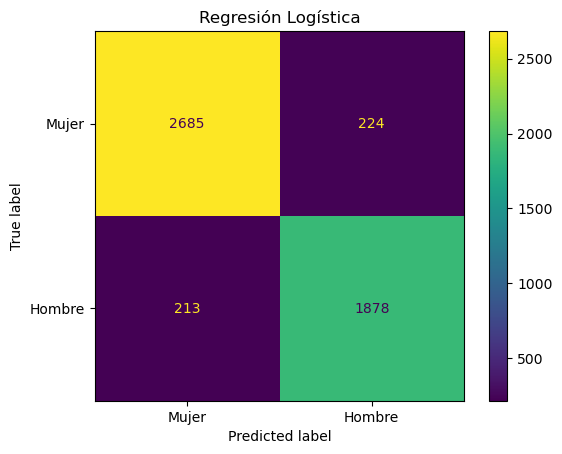

Acuracy: 0.9126 
Sensibilidad: 0.9265010351966874 
Especificidad: 0.8934348239771646 
Precisión: 0.9229975936748024  
F1: 0.9247459962114691


In [30]:
model = LogisticRegression()
train_and_plot_matrix(model, x_train, y_train, x_test, y_test, 'Regresión Logística')

##### Gausiano

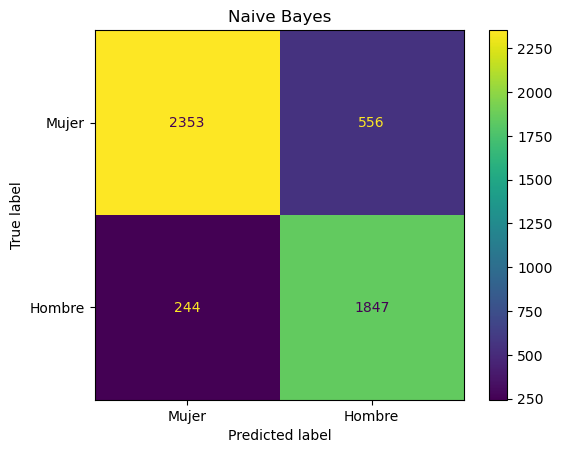

Acuracy: 0.84 
Sensibilidad: 0.9060454370427417 
Especificidad: 0.768622555139409 
Precisión: 0.8088690271570986  
F1: 0.8547039593171086


In [31]:
model = BernoulliNB()
train_and_plot_matrix(model, x_train, y_train, x_test, y_test, 'Naive Bayes')

##### SVC

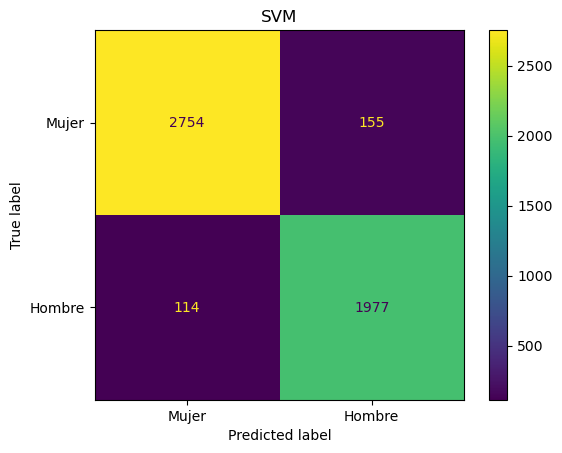

Acuracy: 0.9462 
Sensibilidad: 0.9602510460251046 
Especificidad: 0.9272983114446529 
Precisión: 0.9467170849089034  
F1: 0.9534360394668513


In [32]:
model = SVC()
train_and_plot_matrix(model, x_train, y_train, x_test, y_test, 'SVM')

##### KNN

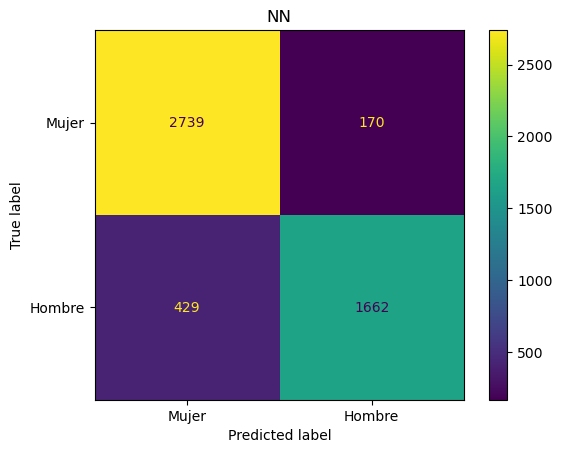

Acuracy: 0.8802 
Sensibilidad: 0.8645833333333334 
Especificidad: 0.9072052401746725 
Precisión: 0.9415606737710553  
F1: 0.9014316274477537


In [33]:
model = KNeighborsClassifier(n_neighbors=1)
train_and_plot_matrix(model, x_train, y_train, x_test, y_test, 'NN')

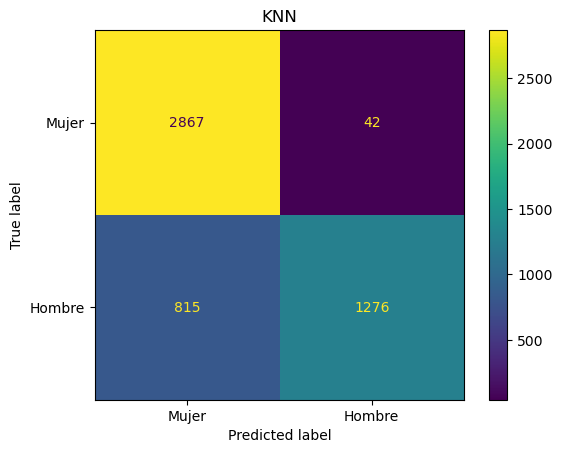

Acuracy: 0.8286 
Sensibilidad: 0.7786529060293319 
Especificidad: 0.9681335356600911 
Precisión: 0.9855620488140254  
F1: 0.8699742072523138


In [34]:
model = KNeighborsClassifier(n_neighbors=10)
train_and_plot_matrix(model, x_train, y_train, x_test, y_test, 'KNN')

### Ejercicio 2: Espacio ROC
En este ejercicio se mostrará el rendimiento de los clasificadores anteriores en el espacio ROC. Para ello se deberá:
1. Entrenar cinco clasificadores diferentes de los vistos hasta ahora en las clases prácticas de la asignatura a partir del conjunto de datos descritos en el apartado 10.2.
2. Obtener las matrices de confusión para cada uno de ellos.
3. A partir de los valores de la matriz de confusión, calcular el TPR y FPR de cada clasificador y mostrarlo en el espacio ROC.
4. Analizar el resultado obtenido.


In [35]:
def train_and_plot_matrix(model, x_train, y_train, x_test, y_test, title):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    tpr = cm[0][0] / (cm[0][0] + cm[0][1])
    fpr = cm[1][0] / (cm[1][0] + cm[1][1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()
    return model, cm, tpr, fpr

##### Regresión Logística

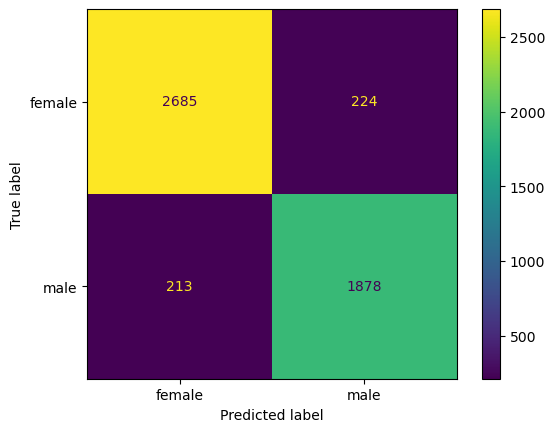

TPR para regresión logística: 0.923%
FPR para regresión logística: 0.102%


In [36]:
logisticRegression = LogisticRegression()
model, cm, reg_lin_tpr, reg_lin_fpr = train_and_plot_matrix(logisticRegression, x_train, y_train, x_test, y_test, 'Regresión Logística')
print(f'TPR para regresión logística: {reg_lin_tpr:.3f}%')
print(f'FPR para regresión logística: {reg_lin_fpr:.3f}%')

##### Gaussiano

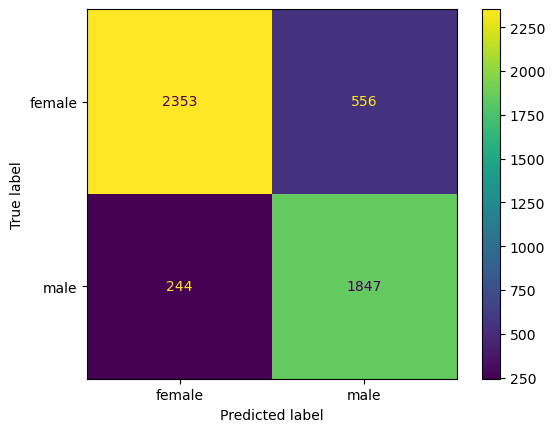

TPR para BernoulliNB: 0.809%
FPR para BernoulliNB: 0.117%


In [37]:
bernoulliNB = BernoulliNB()
model, cm, bern_tpr, bern_fpr = train_and_plot_matrix(bernoulliNB, x_train, y_train, x_test, y_test, 'Naive Bayes')
print(f'TPR para BernoulliNB: {bern_tpr:.3f}%')
print(f'FPR para BernoulliNB: {bern_fpr:.3f}%')

##### SVC

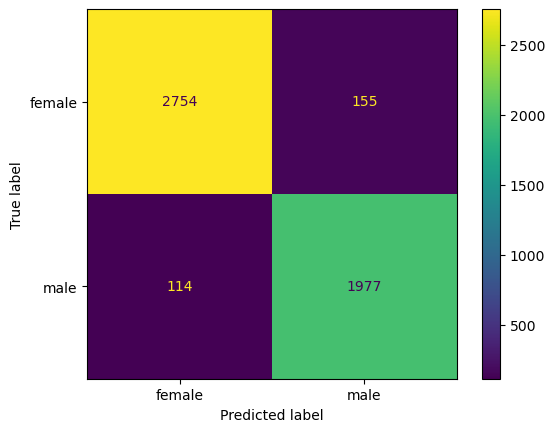

TPR para SVC: 0.947%
FPR para SVC: 0.055%


In [38]:
svc = SVC()
model, cm, svc_tpr, svc_fpr = train_and_plot_matrix(svc, x_train, y_train, x_test, y_test, 'SVM')
print(f'TPR para SVC: {svc_tpr:.3f}%')
print(f'FPR para SVC: {svc_fpr:.3f}%')

##### KNN with n = 1

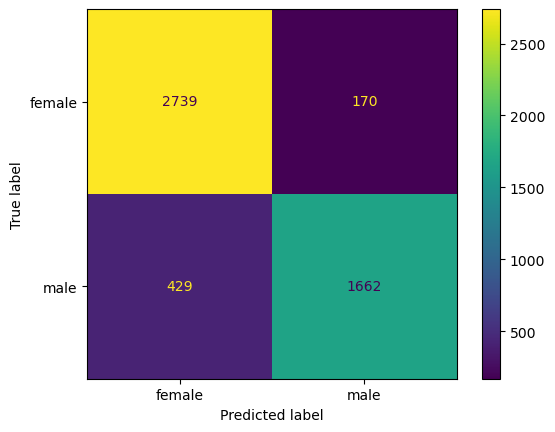

TPR para KNN con k=1: 0.942%
FPR para KNN con k=1: 0.205%


In [39]:
knn1 = KNeighborsClassifier(n_neighbors=1)
model, cm, knn1_tpr, knn1_fpr = train_and_plot_matrix(knn1, x_train, y_train, x_test, y_test, 'KNN con k=1')
print(f'TPR para KNN con k=1: {knn1_tpr:.3f}%')
print(f'FPR para KNN con k=1: {knn1_fpr:.3f}%')

##### KNN with n = 10

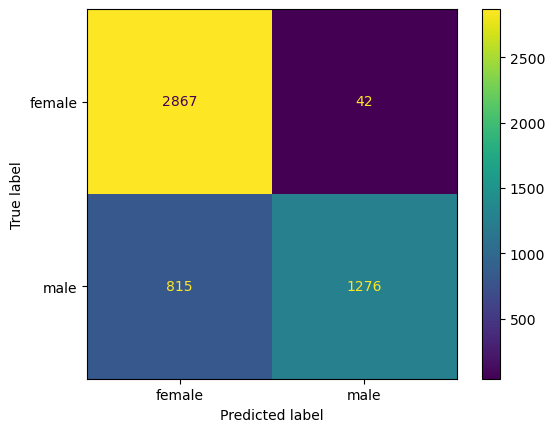

TPR para KNN con k=10: 0.986%
FPR para KNN con k=10: 0.390%


In [40]:
knn10 = KNeighborsClassifier(n_neighbors=10)
model, cm, knn10_tpr, knn10_fpr = train_and_plot_matrix(knn10, x_train, y_train, x_test, y_test, 'KNN con k=10')
print(f'TPR para KNN con k=10: {knn10_tpr:.3f}%')
print(f'FPR para KNN con k=10: {knn10_fpr:.3f}%')

In [41]:
def plot_roc(tpr_fpr_vals: list, labels: list, colors: list, size: int):
    for idx, tpr_fpr in enumerate(tpr_fpr_vals):
        plt.scatter([tpr_fpr[0]], [tpr_fpr[1]], color=colors[idx], label=labels[idx], s=size)
    plt.plot([0, 1], [0, 1], linestyle='--', color="black")
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Espacio ROC')
    plt.legend()
    plt.show()

In [42]:
labels = ["Regresión Logística", "Naive Bayes Bernoulli", "SVM", "KNN (k=1)", "KNN (k=10)"]
colors = ["red", "blue", "green", "orange", "purple"]
tpr_fpr_vals = [
    [reg_lin_fpr, reg_lin_tpr],
    [bern_fpr, bern_tpr],
    [svc_fpr, svc_tpr],
    [knn1_fpr, knn1_tpr],
    [knn10_fpr, knn10_tpr]
]

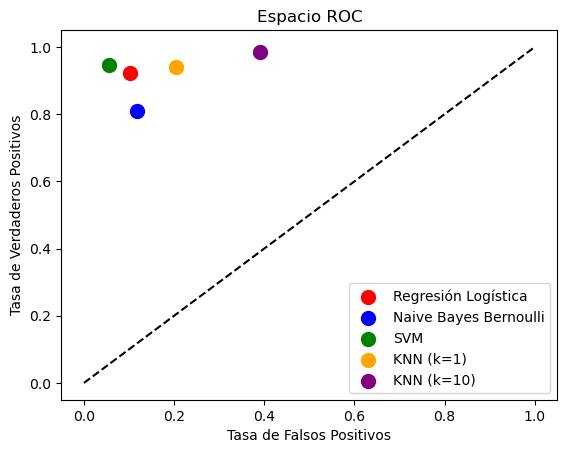

In [43]:
plot_roc(tpr_fpr_vals, labels, colors, 100)

El espacio ROC nos proporciona varias medidas de evaluación. Sabemos que la TPR nos dice hasta qué punto un clasificador es capaz de detectar los casos positivos correctamente. Y la FPR nos dice cuántos casos negativos se clasifican incorrectamente como positivos. Por lo tanto, cuanto más cerca esté la curva ROC de la esquina superior izquierda, mejor será el rendimiento del modelo.

En este caso, el modelo que mejor se comporta es el SVM, ya que es el que más se acerca a la esquina superior izquierda.

### Ejercicio 3: Curva ROC
En el anterior ejercicio se mostraba el rendimiento de clasificadores discretos, en este se hará uso de la probabilidad de pertenencia a cada clase para dibujar la curva ROC de dos clasificadores. La probabilidad de pertenencia a cada clase se puede obtener en algunos clasificadores mediante el método predict_proba que devuelve una matriz con tantas filas como muestras se le pasan y tantas columnas como clases, dondde cada columna se corresponde con la probabilidad de pertenencia a dicha clase.
1. Entrenar un clasificador bayesiano, un clasificador por regresión logística y una máquina de vectores soporte con los datos descritos en la sección 10.2.
2. Dibujar en un único gráfico las curvas ROC de los tres clasificadores anteriores.
3. Analizar el resultado obtenido.



In [44]:
def predict(model, x_test, umbral):
    y_pred = model.predict_proba(x_test)[:,0]
    y_pred = np.where(y_pred > umbral, "female", "male")
    return y_pred

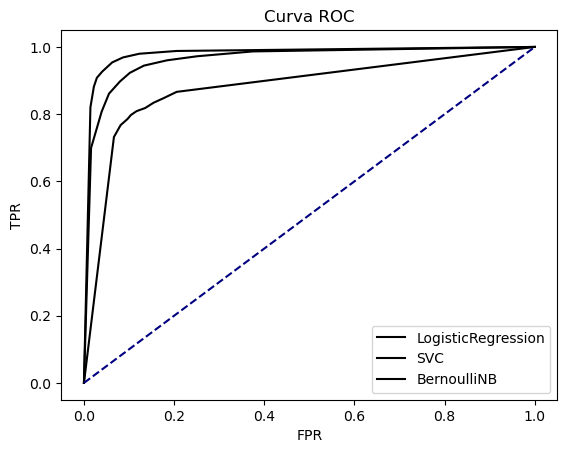

In [45]:
init = [LogisticRegression(), SVC(probability=True), BernoulliNB()]
models = {}
colors = ["red", "blue", "green"]
for m in init:
    m.fit(x_train, y_train)
    tpr = []
    fpr = []
    for i in range(0,11):
        y_pred = predict(m, x_test,i/10)
        cm = confusion_matrix(y_test, y_pred)
        tpr.append(cm[0,0]/(cm[0,0]+cm[0,1]))
        fpr.append(cm[1,0]/(cm[1,0]+cm[1,1]))
        models[m.__class__.__name__] = [tpr,fpr]

for k,v in models.items():
    plt.plot(v[1], v[0], label= k , color = "black")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()